# Divvy Trips Data set analysis

Author: Galal Abdelaziz

This notebook presents my analysis of the [Divvy Trips 2019_Q1 dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) for the __Programming For Data Analytics__ project, at [ATU](https://www.atu.ie/).

***

![Banner](img/divvy.jpg)

***

## Introduction:

This project aims to analyze the __Divvy trip__ data from the first quarter of 2019 to gain insights into city-wide biking trends.

### Importing libraries

In [38]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

In [59]:
# Load the data
file_path = 'dataset/Divvy_Trips_2019_Q1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head(22)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


In [60]:
# Check for missing values (NaN and empty strings) in all columns
missing_counts = {}

for column in df.columns:
    # Count NaN values
    nan_count = df[column].isnull().sum()
    # Count empty strings
    empty_count = (df[column] == '').sum()
    # Total missing values
    total_missing = nan_count + empty_count
    missing_counts[column] = total_missing

# Display the missing values for each column
print("Missing Values (NaN and Empty Cells) in Each Column:")
for column, count in missing_counts.items():
    if count > 0:
        print(f"{column}: {count}")

# Show the column headers
print("\nColumn Headers:")
print(df.columns.tolist())

Missing Values (NaN and Empty Cells) in Each Column:
gender: 19711
birthyear: 18023

Column Headers:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear']


In [57]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Display the missing values for each column
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Show the column headers
print("\nColumn Headers:")
print(df.columns.tolist())

Missing Values in Each Column:
Series([], dtype: int64)

Column Headers:
['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'usertype', 'gender', 'birthyear', 'day_of_week', 'start_time_only', 'end_time_only', 'route', 'age', 'start_hour']


In [40]:
# Data Cleaning
# Replace missing values in 'gender' with 'missing'
df['gender'].fillna('missing', inplace=True)

# Disregard records with birthyear 1938 or older
df = df[df['birthyear'] > 1938]

# Convert 'start_time' and 'end_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [41]:
# Feature Engineering
# Add a column for the day of the week
df['day_of_week'] = df['start_time'].dt.day_name()

# Add columns for start and end time (time only)
df['start_time_only'] = df['start_time'].dt.time
df['end_time_only'] = df['end_time'].dt.time

# Display the cleaned data
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,day_of_week,start_time_only,end_time_only
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,Tuesday,00:04:37,00:11:07
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,Tuesday,00:08:13,00:15:34
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,Tuesday,00:13:23,00:27:12
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,Tuesday,00:13:45,00:43:28
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,Tuesday,00:14:52,00:20:56


In [42]:
# Determine the total number of Divvy trips that occurred in the first quarter of 2019
total_trips = df.shape[0]
print(f'Total number of Divvy trips in Q1 2019: {total_trips}')

Total number of Divvy trips in Q1 2019: 346860


In [43]:
# Identify the number of bikes utilized during the first quarter of 2019
unique_bikes = df['bikeid'].nunique()
print(f'Number of unique bikes utilized in Q1 2019: {unique_bikes}')

Number of unique bikes utilized in Q1 2019: 4757


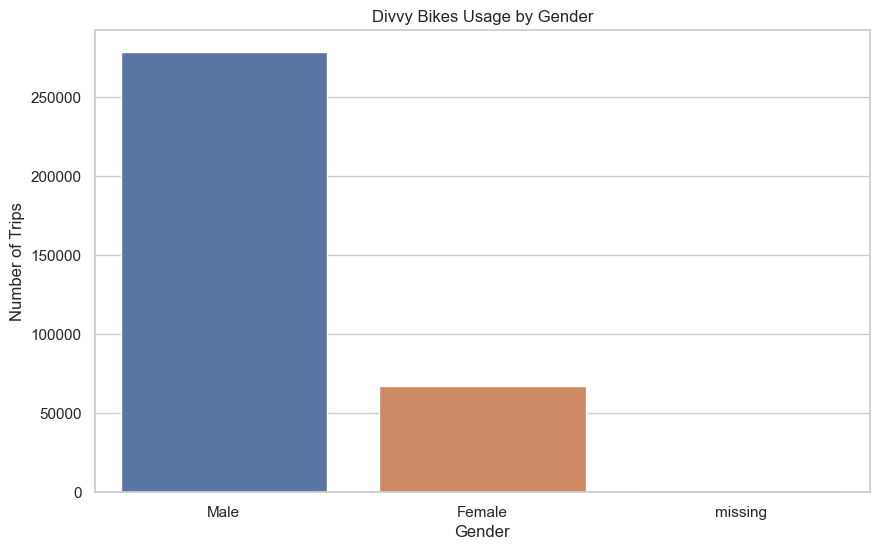

In [51]:
# Plotting the difference of usage more by female or male users
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender')
plt.title('Divvy Bikes Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()